In [1]:
import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (64,64)

data_dir = "C:/Users/DELL/OneDrive/Desktop/ASL_Detection/Data/asl_dataset"

train_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode = 'int', #
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = "training",
    seed = 123
)

val_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode = 'int',
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = "validation",
    seed = 123
)

Found 2515 files belonging to 36 classes.
Using 2012 files for training.
Using 2012 files for training.
Found 2515 files belonging to 36 classes.
Using 503 files for validation.
Found 2515 files belonging to 36 classes.
Using 503 files for validation.


In [2]:
class_names = train_set.class_names
print(class_names)  # ['a', 'b', ..., 'z']

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [3]:
import os

for class_name in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_files = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        print(f"{class_name}: {num_files} files")

0: 70 files
1: 70 files
2: 70 files
3: 70 files
4: 70 files
5: 70 files
6: 70 files
7: 70 files
8: 70 files
9: 70 files
a: 70 files
b: 70 files
c: 70 files
d: 70 files
e: 70 files
f: 70 files
g: 70 files
h: 70 files
i: 70 files
j: 70 files
k: 70 files
l: 70 files
m: 70 files
e: 70 files
f: 70 files
g: 70 files
h: 70 files
i: 70 files
j: 70 files
k: 70 files
l: 70 files
m: 70 files
n: 70 files
o: 70 files
p: 70 files
q: 70 files
r: 70 files
s: 70 files
t: 65 files
u: 70 files
v: 70 files
w: 70 files
x: 70 files
y: 70 files
z: 70 files
n: 70 files
o: 70 files
p: 70 files
q: 70 files
r: 70 files
s: 70 files
t: 65 files
u: 70 files
v: 70 files
w: 70 files
x: 70 files
y: 70 files
z: 70 files


In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_set.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [5]:
from tensorflow.keras import layers, models

# Create an improved model with regularization techniques
model = models.Sequential([
    layers.Conv2D(32, (3,3), strides=2, activation="relu", input_shape=(64, 64, 3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), strides=2, activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3,3), activation="relu"),
    
    # Replace Flatten + Dense with GlobalAveragePooling2D
    layers.GlobalAveragePooling2D(),  # Magic happens here!
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,892 (382.39 KB)

 Trainable params: 97,892 (382.39 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0952 - loss: 3.4077 - val_accuracy: 0.5209 - val_loss: 1.6651
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0952 - loss: 3.4077 - val_accuracy: 0.5209 - val_loss: 1.6651
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5103 - loss: 1.5742 - val_accuracy: 0.7952 - val_loss: 0.6653
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5103 - loss: 1.5742 - val_accuracy: 0.7952 - val_loss: 0.6653
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7287 - loss: 0.8267 - val_accuracy: 0.8231 - val_loss: 0.4783
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7287 - loss: 0.8267 - val_accuracy: 0.8231 - val_loss: 0.4783
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8198 - loss: 0.5831 - val_accuracy: 0.8688 - val_loss: 0.3463
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8198 - loss: 0.5831 - val_accuracy: 0.8688 - val_l

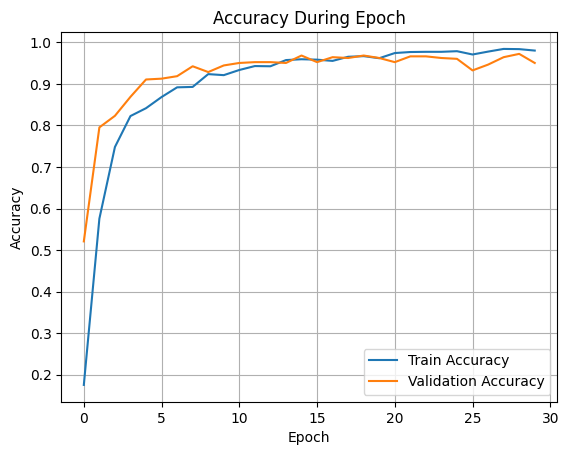

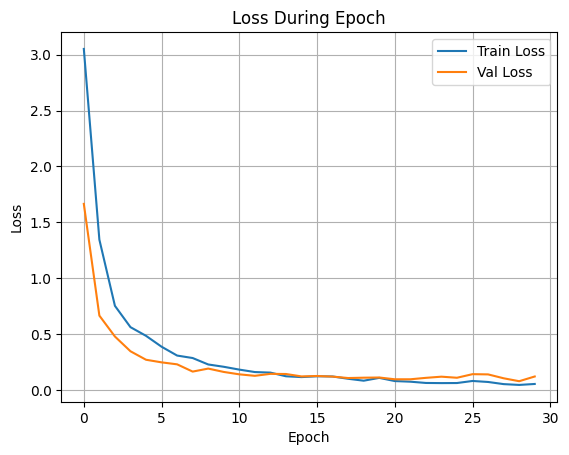

In [7]:
import matplotlib.pyplot as plt

# Accuracy\
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss During Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Check test accuracy

In [17]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/DELL/OneDrive/Desktop/ASL_Detection/Data/test",
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=123,
    shuffle=False
)

# Apply same preprocessing as training
test_ds = test_set.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Now evaluate again
test_loss, test_acc = model.evaluate(test_ds)
print(f"🎯 Accuracy on test set: {test_acc:.2%}")

Found 896 files belonging to 36 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4051 - loss: 7.5930
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4051 - loss: 7.5930
🎯 Accuracy on test set: 15.40%
🎯 Accuracy on test set: 15.40%


In [26]:
metrics = history.history
final_metrics = {key: values[-1] for key, values in metrics.items()}

print(final_metrics)

# Save metrics to JSON file
import json
from pathlib import Path

final_metrics["model_name"] = "nguyen tuan dung's model"

results_path = Path("C:/Users/DELL/OneDrive/Desktop/ASL_Detection")/"ntd_model.json"
results_path.parent.mkdir(exist_ok=True)

with open(results_path, "w") as f:
  json.dump(final_metrics, f, indent=4)

print(f"Saved results to {results_path}")

{'accuracy': 0.9801192879676819, 'loss': 0.053719982504844666, 'val_accuracy': 0.9502981901168823, 'val_loss': 0.12060803174972534}
Saved results to C:\Users\DELL\OneDrive\Desktop\ASL_Detection\ntd_model.json
